# Reuters Newswire Classification

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters

### Split the training and test sets

In [9]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [6]:
print('Number of train examples: {}, Number of test examples: {}'.format(len(train_data), len(test_data)))
print(train_data[10])

Number of train examples: 8982, Number of test examples: 2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


### Convert sequences of word indices back into text representations

In [10]:
word_index = reuters.get_word_index()

In [11]:
reverse_word_index = {value:key for key, value in word_index.items()}

In [20]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### Convert Word Indices to One Hot Encoded Vectors

In [24]:
def vectorize_sequences(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [27]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#### Alternatively we can use a built in Keras method for one hot encoding

In [28]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Build the Neural Network Model

In [29]:
from keras import models, layers

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu',))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [34]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [35]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, validation_data=[x_val, y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 331us/step - loss: 1.4337 - acc: 0.6864 - val_loss: 1.0378 - val_acc: 0.7650
Epoch 2/20
7982/7982 [==============================] - 2s 277us/step - loss: 0.7563 - acc: 0.8314 - val_loss: 0.8943 - val_acc: 0.8130
Epoch 3/20
7982/7982 [==============================] - 3s 318us/step - loss: 0.4820 - acc: 0.8930 - val_loss: 0.8701 - val_acc: 0.8230
Epoch 4/20
7982/7982 [==============================] - 2s 285us/step - loss: 0.3302 - acc: 0.9281 - val_loss: 0.9323 - val_acc: 0.8080
Epoch 5/20
7982/7982 [==============================] - 2s 294us/step - loss: 0.2542 - acc: 0.9421 - val_loss: 0.9649 - val_acc: 0.8300
Epoch 6/20
7982/7982 [==============================] - 3s 319us/step - loss: 0.2145 - acc: 0.9476 - val_loss: 1.0305 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 2s 297us/step - loss: 0.1923 - acc: 0.9521 - val_loss: 1.1180 - val_acc: 0.8110


### Visualize the Loss

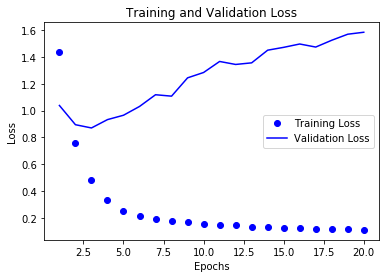

In [41]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Visualize the Accuracy

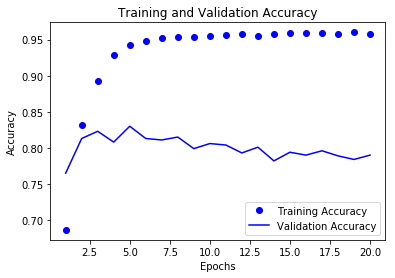

In [43]:
plt.clf()
loss = history.history['acc']
val_loss = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Build a new model and train for only 9 epochs

In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu',))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=9, validation_data=[x_val, y_val])
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 302us/step - loss: 1.4452 - acc: 0.6825 - val_loss: 1.0463 - val_acc: 0.7690
Epoch 2/9
7982/7982 [==============================] - 2s 256us/step - loss: 0.7645 - acc: 0.8269 - val_loss: 0.8812 - val_acc: 0.8220
Epoch 3/9
7982/7982 [==============================] - 2s 255us/step - loss: 0.4786 - acc: 0.8923 - val_loss: 0.8825 - val_acc: 0.8240
Epoch 4/9
7982/7982 [==============================] - 2s 250us/step - loss: 0.3317 - acc: 0.9265 - val_loss: 0.9548 - val_acc: 0.8120
Epoch 5/9
7982/7982 [==============================] - 2s 264us/step - loss: 0.2565 - acc: 0.9437 - val_loss: 0.9664 - val_acc: 0.8180
Epoch 6/9
7982/7982 [==============================] - 2s 258us/step - loss: 0.2160 - acc: 0.9475 - val_loss: 1.0126 - val_acc: 0.8200
Epoch 7/9
7982/7982 [==============================] - 2s 265us/step - loss: 0.1906 - acc: 0.9525 - val_loss: 1.0431 - val_acc: 0.8170
Epoch 8

In [45]:
print(results)

[1.4131342216145217, 0.7733748887440824]


#### Calculate the probability of guessing the correct classification

In [49]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits) / len(test_labels))

0.182546749777382

### Predict on Unseen Data

In [51]:
predictions = model.predict(x_test)

In [56]:
np.argmax(predictions[0])

3

In [57]:
### Build, fit and test the model again using an "information bottleneck"

In [59]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu',))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, validation_data=[x_val, y_val])
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 282us/step - loss: 1.9907 - acc: 0.5631 - val_loss: 1.3745 - val_acc: 0.6740
Epoch 2/20
7982/7982 [==============================] - 2s 252us/step - loss: 1.2190 - acc: 0.7072 - val_loss: 1.2642 - val_acc: 0.7050
Epoch 3/20
7982/7982 [==============================] - 2s 253us/step - loss: 1.0424 - acc: 0.7368 - val_loss: 1.2478 - val_acc: 0.7070
Epoch 4/20
7982/7982 [==============================] - 2s 251us/step - loss: 0.9250 - acc: 0.7596 - val_loss: 1.2634 - val_acc: 0.6950
Epoch 5/20
7982/7982 [==============================] - 2s 255us/step - loss: 0.8309 - acc: 0.7907 - val_loss: 1.2925 - val_acc: 0.7240
Epoch 6/20
7982/7982 [==============================] - 2s 261us/step - loss: 0.7576 - acc: 0.8151 - val_loss: 1.3176 - val_acc: 0.7240
Epoch 7/20
7982/7982 [==============================] - 2s 256us/step - loss: 0.7010 - acc: 0.8254 - val_loss: 1.3750 - val_acc: 0.7120
